In [19]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [20]:
fertilizer_land = pd.read_csv('../../../data/raw/56A7F8EB-EF55-3D48-B789-7B4EE6E3EE0C.csv')
EF = pd.read_excel('../../../data/raw/community_ghg_inventorytool.xlsm', sheet_name='Factors - FormulaText' )

In [21]:
selected_rows = fertilizer_land.loc[fertilizer_land['Domain Category'] == 'FERTILIZER: (TOTAL)']

selected_rows['Value'] = selected_rows['Value'].str.replace(',', '')
selected_rows['Value'] = pd.to_numeric(selected_rows['Value'])

# Sum the numeric values for the selected rows
Total_land = selected_rows['Value'].sum()

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_27068\694780144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['Value'] = selected_rows['Value'].str.replace(',', '')
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_27068\694780144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['Value'] = pd.to_numeric(selected_rows['Value'])


In [22]:
N_volatile = EF.iloc[353:357]

N_lost = N_volatile['Unnamed: 1']*N_volatile['Unnamed: 2']

#the percentage of N lost from a fertilizer of all the fertilizer
syn = N_lost.iloc[0]/N_lost.sum()
org = N_lost.iloc[1]/N_lost.sum()
man = N_lost.iloc[2]/N_lost.sum()

In [23]:
# Specify the columns you want to extract
selected_columns = ['Year', 'County', 'Data Item','Domain', 'Domain Category', 'Value']

# Create a new DataFrame with the selected columns
new_df = fertilizer_land[selected_columns].copy()
new_df['Value'] = new_df['Value'].str.replace(',', '')
new_df['Value'] = pd.to_numeric(new_df['Value'])

result_values = []
    
    
for i in range(2,24,3):
    result_value = (new_df.iloc[i]['Value'] - new_df.iloc[i-1]['Value']-new_df.iloc[i-2]['Value'])*syn + new_df.iloc[i-2]['Value']*man + new_df.iloc[i-1]['Value']*org
    result_values.append(result_value)

In [24]:
new_df.to_csv('../../../data/tidy/fertilizer-treated-land-area.csv')
new_df 

,Year,County,Data Item,Domain,Domain Category,Value
0,2017,FAIRFIELD,"AG LAND - TREATED, MEASURED IN ACRES",FERTILIZER,FERTILIZER: (MANURE),288
1,2017,FAIRFIELD,"AG LAND - TREATED, MEASURED IN ACRES",FERTILIZER,FERTILIZER: (ORGANIC),188
2,2017,FAIRFIELD,"AG LAND - TREATED, MEASURED IN ACRES",FERTILIZER,FERTILIZER: (TOTAL),2269
3,2017,HARTFORD,"AG LAND - TREATED, MEASURED IN ACRES",FERTILIZER,FERTILIZER: (MANURE),1436
4,2017,HARTFORD,"AG LAND - TREATED, MEASURED IN ACRES",FERTILIZER,FERTILIZER: (ORGANIC),459
5,2017,HARTFORD,"AG LAND - TREATED, MEASURED IN ACRES",FERTILIZER,FERTILIZER: (TOTAL),16157
6,2017,LITCHFIELD,"AG LAND - TREATED, MEASURED IN ACRES",FERTILIZER,FERTILIZER: (MANURE),4812
7,2017,LITCHFIELD,"AG LAND - TREATED, MEASURED IN ACRES",FERTILIZER,FERTILIZER: (ORGANIC),2596
8,2017,LITCHFIELD,"AG LAND - TREATED, MEASURED IN ACRES",FERTILIZER,FERTILIZER: (TOTAL),15090
9,2017,MIDDLESEX,"AG LAND - TREATED, MEASURED IN ACRES",FERTILIZER,FERTILIZER: (MANURE),949


In [25]:
NHM = new_df.at[14,'Value']
HEM = new_df.at[5,'Value']+new_df.at[11,'Value']+new_df.at[20,'Value']
BSN = new_df.at[2,'Value']

result_values
unique_counties = new_df['County'].unique()

syn_amount = []

for i in range(2,24,3):
    synthetic = new_df.iloc[i]['Value'] - new_df.iloc[i-1]['Value']-new_df.iloc[i-2]['Value']
    syn_amount.append(synthetic)

combined_df = pd.DataFrame({'Value': result_values, 'County': unique_counties})
total= combined_df['Value'].sum()
combined_df['Ratio']=combined_df['Value']/total
combined_df

,Value,County,Ratio
0,1669.549815,FAIRFIELD,0.040934
1,13201.407749,HARTFORD,0.323671
2,7308.324723,LITCHFIELD,0.179185
3,2148.833948,MIDDLESEX,0.052685
4,3494.512915,NEW HAVEN,0.085678
5,6719.579336,NEW LONDON,0.164750
6,4597.616236,TOLLAND,0.112724
7,1646.686347,WINDHAM,0.040373


In [26]:
ct_emissions = pd.read_excel('../../../data/raw/Public GHG data 1990-2021.xlsx', sheet_name="Emission Totals")

agri =  ct_emissions.at[0,2017]
combined_df['GHG Emissions (MMTCO2e)'] = agri*combined_df['Ratio']

NewH = combined_df.at[4,'GHG Emissions (MMTCO2e)']
Hart = combined_df.at[1,'GHG Emissions (MMTCO2e)']+combined_df.at[3,'GHG Emissions (MMTCO2e)']+combined_df.at[6,'GHG Emissions (MMTCO2e)']
Bridge = combined_df.at[0,'GHG Emissions (MMTCO2e)']

In [27]:
agri_emissions_1 = pd.DataFrame({
        'MSA': ['New Haven ','Hartford-East Hartford-Middletown','Bridgeport-Stamford-Norwalk'],
        'GHG Emissions (MMTCO2e)': [NewH,Hart,Bridge]
    })

agri_emissions_1['GHG Emissions (MMTCO2e)'].sum()

agri_emissions_1['Emissions per capita/tCO2e']=agri_emissions_1['GHG Emissions (MMTCO2e)']*1000000/[NHM,HEM,BSN]

In [28]:
agri_emissions = pd.DataFrame({
        'MSA': ['New Haven-Milford','Hartford-East Hartford-Middletown','Bridgeport-Stamford-Norwalk'],
        'Manure fertilizer land area (acres)': [new_df.at[12,'Value'],new_df.at[3,'Value']+new_df.at[9,'Value']+new_df.at[18,'Value'],new_df.at[0,'Value']],
        'Organic fertilizer land area (acres)': [new_df.at[13,'Value'],new_df.at[4,'Value']+new_df.at[10,'Value']+new_df.at[19,'Value'],new_df.at[1,'Value']],
        'Synthetic fertilizer land area (acres)': [syn_amount[4],syn_amount[1]+syn_amount[3]+syn_amount[6],syn_amount[0]]
    })
agri_emissions 

agri_emissions['Manure fertilizer'] = agri_emissions['Manure fertilizer land area (acres)']*man
agri_emissions['Organic fertilizer'] = agri_emissions['Organic fertilizer land area (acres)']*org
agri_emissions['Synthetic fertilizer'] = agri_emissions['Synthetic fertilizer land area (acres)']*syn

agri_emissions['Manure fertilizer emissions (MMTCO2e)'] = agri_emissions['Manure fertilizer']/total*agri
agri_emissions['Organic fertilizer emissions (MMTCO2e)'] = agri_emissions['Organic fertilizer']/total*agri
agri_emissions['Synthetic fertilizer emissions (MMTCO2e)'] = agri_emissions['Synthetic fertilizer']/total*agri

In [29]:
agri_emissions

a=agri_emissions['Manure fertilizer emissions (MMTCO2e)'].sum()
s=agri_emissions['Organic fertilizer emissions (MMTCO2e)'].sum()
d=agri_emissions['Synthetic fertilizer emissions (MMTCO2e)'].sum()
h=a+s+d

agri_emissions['GHG Emissions (MMTCO2e)'] = agri_emissions_1['GHG Emissions (MMTCO2e)']
agri_emissions


,MSA,Manure fertilizer land area (acres),Organic fertilizer land area (acres),Synthetic fertilizer land area (acres),Manure fertilizer,Organic fertilizer,Synthetic fertilizer,Manure fertilizer emissions (MMTCO2e),Organic fertilizer emissions (MMTCO2e),Synthetic fertilizer emissions (MMTCO2e),GHG Emissions (MMTCO2e)
0,New Haven-Milford,1125,173,3764,10.378229,11.809963,3472.324723,0.000087,0.000099,0.029055,0.029241
1,Hartford-East Hartford-Middletown,8267,592,21497,76.263838,40.413284,19831.180812,0.000638,0.000338,0.165942,0.166918
2,Bridgeport-Stamford-Norwalk,288,188,1793,2.656827,12.833948,1654.059041,0.000022,0.000107,0.013841,0.013970


In [30]:
#scale up the emissions by population to incorporate the new towns
population_five_towns = pd.read_csv('../../../data/tidy/population-five-towns.csv')
population_five_towns = population_five_towns[['Year', 'New Haven-Milford, CT Metro Area', 'Hartford-East Hartford-Middletown, CT Metro Area', 'Bridgeport-Stamford-Norwalk, CT Metro Area', 'Connecticut']]
population_five_towns_21 = population_five_towns.iloc[0,1:4]

population = pd.read_csv('../../../data/tidy/population.csv')
population = population[['Year', 'New Haven-Milford, CT Metro Area', 'Hartford-East Hartford-Middletown, CT Metro Area', 'Bridgeport-Stamford-Norwalk, CT Metro Area', 'Connecticut']]
population_21 = population.iloc[0,1:4]
numeric_pop_21 = pd.to_numeric(population_21.str.replace(',', ''), errors='coerce')

ratio_NHM = population_five_towns_21[0]/numeric_pop_21[0]
ratio_HHM = population_five_towns_21[1]/numeric_pop_21[1]
ratio_BSN = population_five_towns_21[2]/numeric_pop_21[2]

# Define the numbers to multiply for each MSA
multipliers = {'New Haven-Milford': ratio_NHM, 'Hartford-East Hartford-Middletown': ratio_HHM, 'Bridgeport-Stamford-Norwalk': ratio_BSN}

# Multiply the values in the specified column by the respective multipliers
agri_emissions['GHG Emissions (MMTCO2e)'] = agri_emissions.apply(lambda row: row['GHG Emissions (MMTCO2e)'] * multipliers.get(row['MSA'], 1), axis=1)
agri_emissions['Manure fertilizer land area (acres)']=agri_emissions.apply(lambda row: row['Manure fertilizer land area (acres)'] * multipliers.get(row['MSA'], 1), axis=1)
agri_emissions['Organic fertilizer land area (acres)']=agri_emissions.apply(lambda row: row['Organic fertilizer land area (acres)'] * multipliers.get(row['MSA'], 1), axis=1)
agri_emissions['Synthetic fertilizer land area (acres)']=agri_emissions.apply(lambda row: row['Synthetic fertilizer land area (acres)'] * multipliers.get(row['MSA'], 1), axis=1)

agri_emissions['Manure fertilizer emissions (MMTCO2e)']=agri_emissions.apply(lambda row: row['Manure fertilizer emissions (MMTCO2e)'] * multipliers.get(row['MSA'], 1), axis=1)
agri_emissions['Organic fertilizer emissions (MMTCO2e)']=agri_emissions.apply(lambda row: row['Organic fertilizer emissions (MMTCO2e)'] * multipliers.get(row['MSA'], 1), axis=1)
agri_emissions['Synthetic fertilizer emissions (MMTCO2e)']=agri_emissions.apply(lambda row: row['Synthetic fertilizer emissions (MMTCO2e)'] * multipliers.get(row['MSA'], 1), axis=1)

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_27068\3218753668.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio_NHM = population_five_towns_21[0]/numeric_pop_21[0]
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_27068\3218753668.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio_HHM = population_five_towns_21[1]/numeric_pop_21[1]
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_27068\3218753668.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a valu

In [31]:
#the ratio of manure, organic, and synthetic fertilizer
agri_emissions['organic fertilizer ratio']=agri_emissions['Organic fertilizer']/total
agri_emissions['Manure fertilizer ratio']=agri_emissions['Manure fertilizer']/total
agri_emissions['Synthetic fertilizer ratio']=agri_emissions['Synthetic fertilizer']/total


agri_emissions

,MSA,Manure fertilizer land area (acres),Organic fertilizer land area (acres),Synthetic fertilizer land area (acres),Manure fertilizer,Organic fertilizer,Synthetic fertilizer,Manure fertilizer emissions (MMTCO2e),Organic fertilizer emissions (MMTCO2e),Synthetic fertilizer emissions (MMTCO2e),GHG Emissions (MMTCO2e),organic fertilizer ratio,Manure fertilizer ratio,Synthetic fertilizer ratio
0,New Haven-Milford,1125.000000,173.000000,3764.000000,10.378229,11.809963,3472.324723,0.000087,0.000099,0.029055,0.029241,0.000290,0.000254,0.085134
1,Hartford-East Hartford-Middletown,8441.180671,604.473081,21949.928738,76.263838,40.413284,19831.180812,0.000652,0.000345,0.169438,0.170435,0.000991,0.001870,0.486219
2,Bridgeport-Stamford-Norwalk,297.002729,193.876781,1849.048239,2.656827,12.833948,1654.059041,0.000023,0.000111,0.014273,0.014407,0.000315,0.000065,0.040554


In [32]:
agri_emissions.iloc[:, 0] = ['New Haven Area','Hartford Area','Bridgeport Area']
agri_emissions

,MSA,Manure fertilizer land area (acres),Organic fertilizer land area (acres),Synthetic fertilizer land area (acres),Manure fertilizer,Organic fertilizer,Synthetic fertilizer,Manure fertilizer emissions (MMTCO2e),Organic fertilizer emissions (MMTCO2e),Synthetic fertilizer emissions (MMTCO2e),GHG Emissions (MMTCO2e),organic fertilizer ratio,Manure fertilizer ratio,Synthetic fertilizer ratio
0,New Haven Area,1125.000000,173.000000,3764.000000,10.378229,11.809963,3472.324723,0.000087,0.000099,0.029055,0.029241,0.000290,0.000254,0.085134
1,Hartford Area,8441.180671,604.473081,21949.928738,76.263838,40.413284,19831.180812,0.000652,0.000345,0.169438,0.170435,0.000991,0.001870,0.486219
2,Bridgeport Area,297.002729,193.876781,1849.048239,2.656827,12.833948,1654.059041,0.000023,0.000111,0.014273,0.014407,0.000315,0.000065,0.040554


In [33]:
agri_emissions.to_csv('../../../results/sectors/agriculture-emissions.csv')

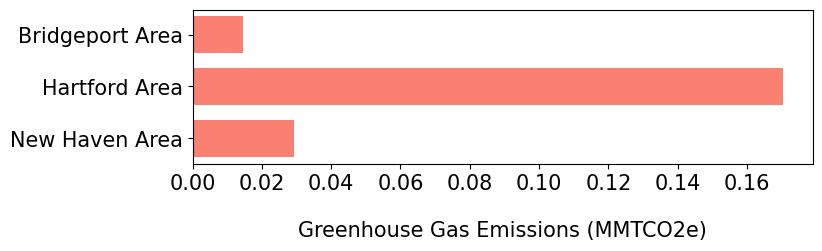

In [34]:
plt.figure(figsize=(8, 2))
msa = agri_emissions.iloc[0:3,0]
values = agri_emissions.iloc[0:3,10]

plt.barh(msa, values, 0.7, color="salmon")
plt.xlabel("Greenhouse Gas Emissions (MMTCO2e)",fontsize=15, labelpad=20)
plt.xticks(fontsize=15)  # Adjust the font size as needed
plt.yticks(fontsize=15)

plt.savefig('../../../figures/Report-images/ghg-emissions-agriculture-mobile.png', dpi=600,bbox_inches='tight')

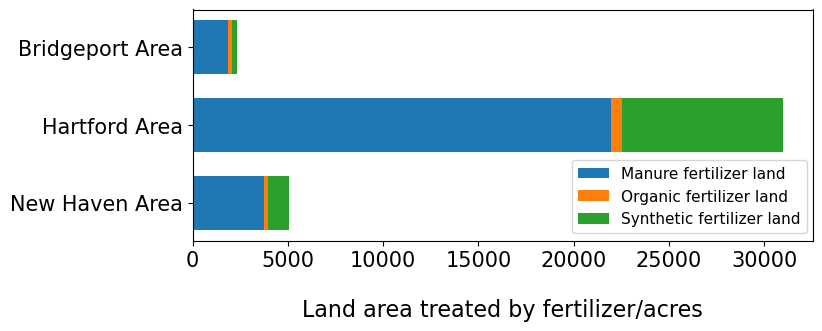

In [35]:
plt.figure(figsize=(8, 3))
X = ['New Haven Area','Hartford Area','Bridgeport Area']

manure = agri_emissions ['Manure fertilizer land area (acres)']
organic = agri_emissions ['Organic fertilizer land area (acres)']
synthetic = agri_emissions ['Synthetic fertilizer land area (acres)']

bar_width = 0.7  # Width of each bar

# Plot the stacked bars for carbon sequestration with flipped axes
plt.barh(X, synthetic, label='Manure fertilizer land', height=bar_width)
plt.barh(X, organic, left=synthetic, label='Organic fertilizer land', height=bar_width)
plt.barh(X, manure, left=synthetic + organic, label='Synthetic fertilizer land', height=bar_width)


plt.xlabel("Land area treated by fertilizer/acres",fontsize=16, labelpad=20)
plt.xticks(fontsize=15)  # Adjust the font size as needed
plt.yticks(fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(0.6, 0.38), fontsize=11)

plt.savefig('../../../figures/Report-images/AG-land-area.png', dpi=600,bbox_inches='tight')

In [36]:
#plot the emissions per acrea